### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
Loan_data = pd.read_csv('loan_approval.csv')
Loan_data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
Loan_data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [4]:
#make a copy of Loan_data and assign it to Xdata
Xdata = Loan_data.copy()
Xdata.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
#Splitting the data, and drop the loan_id column cause we don't need it
X = Xdata.drop(['loan_id', ' loan_status'], axis=1)
y = Xdata[' loan_status']

X.shape
y.shape

(4269,)

In [6]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [7]:
y.shape

(4269,)

In [8]:
X.shape

(4269, 11)

#### Data Preprocessing

In [9]:
Loan_data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [10]:
X.dtypes

no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
dtype: object

Converting Categorical data

In [11]:
# One-hot encoding for education and self-employed columns
X = pd.get_dummies(X, columns=[' education', ' self_employed'], drop_first=True)
X.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,False,False
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,True,True
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,False,False
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,False,False
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,True,True


In [12]:
X.columns

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' education_ Not Graduate',
       ' self_employed_ Yes'],
      dtype='object')

In [13]:
X.dtypes

no_of_dependents            int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
education_ Not Graduate      bool
self_employed_ Yes           bool
dtype: object

In [14]:
X[' education_ Not Graduate'] = X[' education_ Not Graduate'].astype(int)
X[' self_employed_ Yes'] = X[' self_employed_ Yes'].astype(int)
X.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1


In [15]:
y.head()

0     Approved
1     Rejected
2     Rejected
3     Rejected
4     Rejected
Name:  loan_status, dtype: object

In [16]:
y.unique()

array([' Approved', ' Rejected'], dtype=object)

In [17]:
#convert label (y) data to binary
y = y.map({' Approved':1, ' Rejected':0})
y.head()

0    1
1    0
2    0
3    0
4    0
Name:  loan_status, dtype: int64

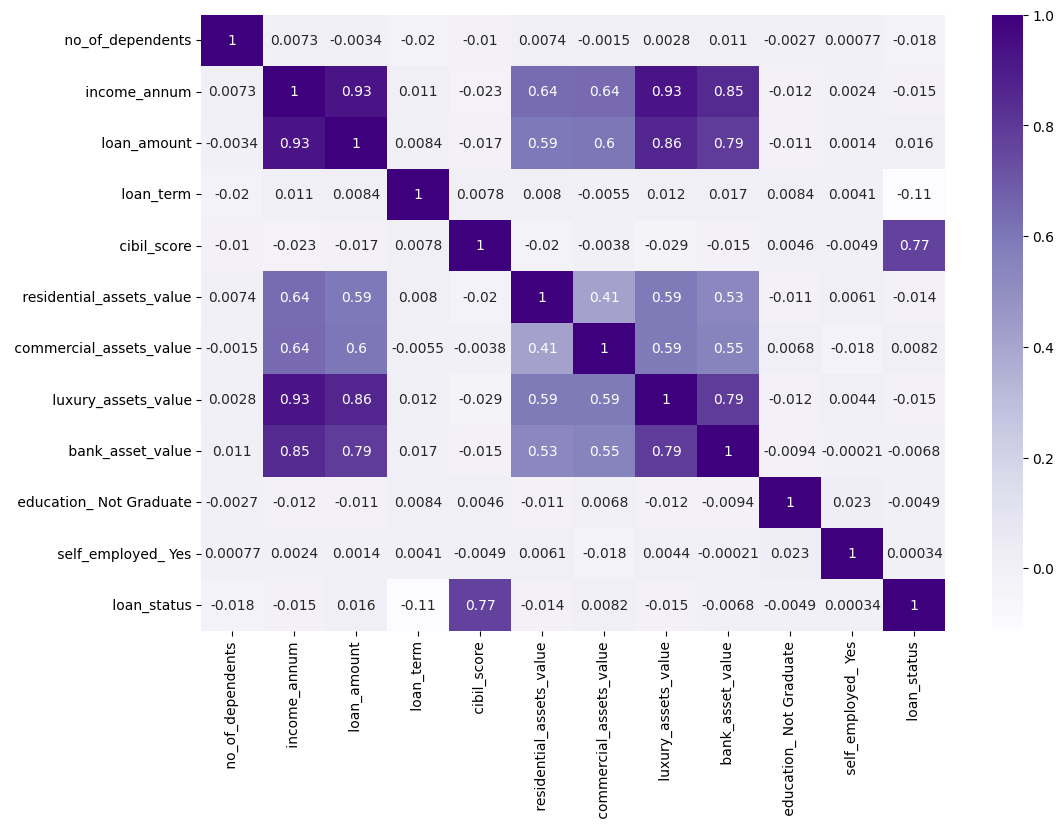

In [18]:
#Correlation Between Features
df = pd.concat([X, y], axis=1)


plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="Purples")
plt.show()

Feature Importance

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

Feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(Feature_importances)


cibil_score                 0.825386
loan_term                   0.055516
loan_amount                 0.028515
income_annum                0.017845
luxury_assets_value         0.016846
residential_assets_value    0.015717
commercial_assets_value     0.015026
bank_asset_value            0.013246
no_of_dependents            0.007442
self_employed_ Yes          0.002348
education_ Not Graduate     0.002114
dtype: float64


In [20]:
X.columns

Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' education_ Not Graduate',
       ' self_employed_ Yes'],
      dtype='object')

In [21]:
threshold = 0.017
selected_features = Feature_importances[Feature_importances > threshold].index  
X_selected = X[selected_features]


In [22]:
X_selected.columns

Index([' cibil_score', ' loan_term', ' loan_amount', ' income_annum'], dtype='object')

In [23]:
X_selected.head()

,cibil_score,loan_term,loan_amount,income_annum
0,778,12,29900000,9600000
1,417,8,12200000,4100000
2,506,20,29700000,9100000
3,467,8,30700000,8200000
4,382,20,24200000,9800000


### train_test_split

In [24]:
from sklearn.model_selection import train_test_split
# Splitting into train (80%) and temp (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Splitting temp (20%) into validation (10%) and test (10%) sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Testing set size:", X_test.shape)

Training set size: (3415, 4)
Validation set size: (427, 4)
Testing set size: (427, 4)


Perform scaling. Why scaling after splitting? It is because if we perform feature scaling before the train-test split then it will cause information leakage on testing datasets which neglects the purpose of having a testing dataset and hence we should always perform feature scaling after the train-test split ~ Shrish, analyticsvidhya.com

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### ANN

In [26]:
# Initializing ANN
Neural_network = tf.keras.models.Sequential()

In [27]:
# Creating the Hidden Layers

# First layer
Neural_network.add(tf.keras.layers.Dense(units=6, activation='relu'))


In [28]:
# Second layer
Neural_network.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [29]:
# Output layer
Neural_network.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [30]:
# Compile the ANN
Neural_network.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

Training

In [31]:
#Fitting the ANN
Neural_network.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4557 - loss: 218451.5625
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5041 - loss: 13600.1035
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5259 - loss: 3114.8550
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5567 - loss: 2169.0569
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5346 - loss: 2474.5037
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5523 - loss: 2103.2188
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5451 - loss: 1685.7268
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5288 - loss: 1395.5266
Epoch 9/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5627 - loss: 1346.8151
Epoch 10/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5362 - loss: 2127.0410
Epoch 11/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5390 - loss: 1505.7338
Epoch

In [32]:
#Fitting ANN
Neural_network.fit(X_train_scaled,y_train,batch_size=32,epochs = 100)

Epoch 1/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6521 - loss: 0.5994
Epoch 2/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9026 - loss: 0.3230
Epoch 3/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9203 - loss: 0.2652
Epoch 4/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9319 - loss: 0.2312
Epoch 5/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9287 - loss: 0.2228
Epoch 6/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9389 - loss: 0.2039
Epoch 7/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9351 - loss: 0.2128
Epoch 8/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9447 - loss: 0.1830
Epoch 9/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9478 - loss: 0.1690
Epoch 10/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9458 - loss: 0.1831
Epoch 11/100
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9499 - loss: 0.1755
Epoch 12/100
107/107 ━━━━━━━━━━━━━━━━━━━━

So I've fitted the model on scaled(X_train_scaled) and unscaled(X_train) data just to show how scaling can improve a model's accuracy. Scaled data was able to attain an accuracy of 96.31%, which is pretty good, and the unscaled data attained an accuracy of 55.37% which is mid. So scale your data guys. Also notice the  loss in the scaled data.

Testing

In [36]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = (Neural_network.predict(X_test_scaled) > 0.5).astype(int)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       158
           1       0.96      0.97      0.97       269

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427



Save the model

In [38]:
Neural_network.save('ANN.keras')

In [40]:
X_train.columns

Index([' cibil_score', ' loan_term', ' loan_amount', ' income_annum'], dtype='object')

In [ ]:
# let's test 
import tensorflow as tf

model = tf.keras.models.load_model('ANN.keras')

# load data
data = pd.DataFrame ({
    ' cibil_score': [780, 550, 870, 400], 
    ' loan_term': [10, 4, 16, 20], 
    ' loan_amount': [32000000, 43000000, 12000000, 500000], 
    ' income_annum': [9000000, 12000000, 9000000, 12000000]
    })

#Make predictions
predictions = model.predict(data)
predictions = (predictions > 0.5).astype(int)

#create mapping
status_mapping = {0: '0-loan request Rejected', 1:'Loan request Approved'}

#print the predictions with labels
for i, prediction in enumerate(predictions):
    label = status_mapping[int(prediction)]
    print(f'Data{i+1}: Predicted Outcome- {label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step

c:\ML projects\Loan prediction\.virtualenv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Data1: Predicted Outcome- Loan request Approved
Data2: Predicted Outcome- Loan request Approved
Data3: Predicted Outcome- Loan request Approved
Data4: Predicted Outcome- 0-loan request Rejected


C:\Users\user\AppData\Local\Temp\ipykernel_18052\3035996893.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = status_mapping[int(prediction)]
